In [2]:
import ast 
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\keerthi\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_exploded = df.explode('job_skills')

In [4]:
skills_count = df_exploded.groupby(['job_title_short','job_skills']).size()

In [5]:
type(skills_count)

pandas.core.series.Series

So converting the skills_count from series datatype into a dataframe for  better plottting  

In [6]:
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)    
df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


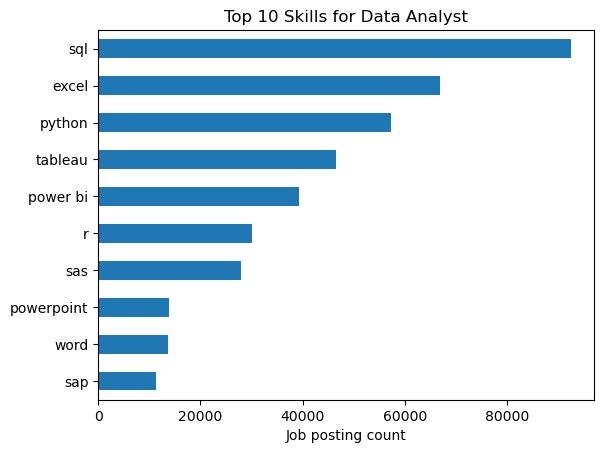

In [19]:
job_title = 'Data Analyst'
top_skills = 10
df_skill_final = df_skills_count[df_skills_count['job_title_short']== job_title].head(top_skills)
df_skill_final.plot(kind='barh',x='job_skills',y='skill_count')
plt.gca().invert_yaxis() # here it makes charts in order
plt.title(f'Top {top_skills} Skills for {job_title}')
plt.xlabel('Job posting count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()
